# 导入本工程所需要的第三方库
- 引包解释
    * pandas：读取csv数组
    * numpy：主要使用其中array，reshape函数预处理数据
    * LinearRegression：数据线性回归的框架依赖
    * matplotlib.pyplot：实现数据可视化

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 文件读入


In [2]:
data=pd.read_csv("wsdata.csv",encoding="utf8")

# 基础常量设置

- 变量解释
    * day：训练的天数
    * train_time：通过训练天数算得训练时间


In [3]:
day=700
train_time=60*24*day

# 数据预处理
## 通过一系列的操作使数据变为fit函数可操作的数据

- 变量解释
    * x_train：时间戳转化为的x训练集
    * y_train：温度转化为的y训练集


In [4]:
#  选择 时间戳 作为x_train数据源
x_train=[data["时间戳"][100:100+int(train_time/60)]]
x_train=x_train[0].tolist()
for index,value in enumerate(x_train):
    x_train[index]=int(x_train[index])
for index,value in enumerate(x_train):
    x_train[index]-=x_train[-1]

#  由于选择了初始时间，此处把x_train反转
x_train=x_train[::-1]

#  选择 温度 作为y_train数据源
y_train=[data["温度"][100:100+int(train_time/60)]]

y_train=y_train[0].tolist()
for index,value in enumerate(y_train):
    y_train[index]=float(y_train[index])
    
#  由于x_train进行了反转，因此y_train也随之反转
y_train=y_train[::-1]
    
#  由于LinearRegression实例中的fit函数要求2D参数，
#  我们将训练数据集进行reshape处理
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

# 初阶简单线性回归

- 变量解释
    * lin_reg：创建的LinearRegression实例
    * y_pred：作为接收预测数据的一个容器
    * y_after：接收list化的y_pred来作为plt参数

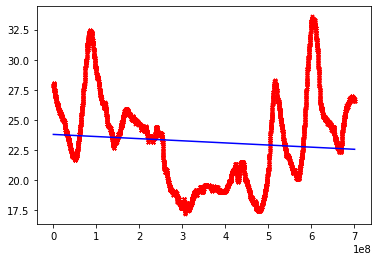

In [5]:
#  创建的LinearRegression实例并进行拟合
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

#  定义y_pred为x_train的预测集，并最终转化为y_after用来绘图
y_pred=lin_reg.predict(x_train)
y_pred=y_pred.reshape(-1,)
y_after=list(y_pred)

# 绘图
plt.plot(x_train,y_after,color='b')
plt.scatter(x_train,y_train,s=10,marker='x',color='r')

# 定义短滑窗线性回归拟合函数
    本模块使用短时数据实现短时预测，
    实验证明这样极大地上增加了拟合的精准度
- 变量解释
    * Docker_x：作为存储用来绘图的数据real_x的容器
    * Docker_y：作为存储用来绘图的数据real_y的容器
    * Docker_py：作为存储用来绘图的数据real_py的容器
    * short_lin：创建的用来处理短数据的LinearRegression实例
    * data_length：每次作为训练集的数据长度
    * time_length：总共需要预测的时长

In [6]:
def sliding_lin(dlength,tlength):
    
    #  变量定义
    data_length=dlength
    time_length=tlength
    Docker_x=[]
    Docker_y=[]
    Docker_py=[]
    
    temp_short_lin=LinearRegression()
    for i in range(tlength):
        #  每次运行前执行init函数初始化
        temp_short_lin.__init__()
        
        #  通过前置 train 数据连续截取data_length的数据
        short_data_x=x_train[i:i+dlength]
        short_data_y=y_train[i:i+dlength]
          
        #  借助截取的数据进行LinearRegression的拟合
        temp_short_lin.fit(short_data_x,short_data_y)
        
        #  通过前置 train 数据截取获得进行预测的真实数据
        real_x=x_train[i+dlength:i+dlength+1]
        real_y=y_train[i+dlength:i+dlength+1]
        
        #  通过predict函数获取 real_y 的预测值
        predict_y=temp_short_lin.predict(real_x)
        
        #  将本次循环的数据存储到对应的容器当中
        Docker_x.append(real_x[0])
        Docker_y.append(real_y[0])
        Docker_py.append(predict_y[0])
    
    #  绘图    
    plt.plot(Docker_x,Docker_y,color='r')
    plt.scatter(Docker_x,Docker_py,color='b')

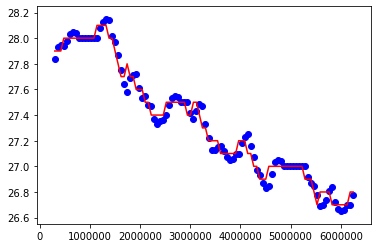

In [7]:
sliding_lin(5,100)